## Heart Failure Prediction Dataset
## Прогнозирование сердечной недостаточности

|Студент | Лошманов Юрий |
|---------|------------|
|Группа | М8О-306Б-19 |
| Номер по списку| 16         |

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('heart.csv')
print(data.shape)
data.head()

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


1. Age: возраст пациента   
2. Sex: пол пациента (M: Мужчина, F: Женщина)
3. ChestPainType: тип боли в груди   
* TA: Типичная стенокардия
* ATA: Атипичная стенокардия 
* NAP: Неангинальная боль 
* ASY: Бессимптомная
4. RestingBP: кровяное давление в покое (мм рт. ст.)
5. Cholesterol: холестерин (мм/дл)
6. FastingBS: уровень сахара в крови натощак (1: если уровень сахара в крови натощак > 120 мг/дл, 0: в противном случае)
7. RestingECG: результаты электрокардиограммы в покое 
* Normal: Нормальный  
* ST: Наличие аномальных зубцов S и T (отрицательный зубец T и/или отрицательное или положительное отклонение ST > 0.05 мВ)
* LVH: наличие гипертрофии левого желудочка по критериям ЭхоКГ
8. MaxHR: достигнутая максимальная частота сердечных сокращений (числовое значение от 60 до 202)
9. ExerciseAngina: стенокардия, вызванная физической нагрузкой (Y: да, N: нет)
10. Oldpeak: числовое значение ST, измеренное в депрессии 
11. ST_Slope: наклон сегмента ST при пиковой нагрузке 
* Down: наклон вниз
* Flat: нет наклона (плоский)
* Up наклон вверх
12. HeartDisease: Сердечная недостаточность: выходной класс (1: болезнь сердца, 0: норма)

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


Сделаем числовое отображение: 
* пол пациена (0 - мужчина, 1 - женщина)   
* тип боли в груди (0 - TA, 1 - ATA, 2 - NAP, 3 - ASY)
* результаты ЭКГ в покое (0 - Normal, 1 - ST, 2 - LVH)
* стенокардия, вызванная физической нагрузкой (1 - да, 0 - нет)
* наклон сегмента ST при пиковой нагрузке (0 - Down, 1 - Flat, 2 - Up)

In [5]:
data["Sex"] = [0 if i == "M" else 1 for i in data["Sex"]]
data["ChestPainType"] = [0 if i == "TA" else 1 if i == "ATA" else 2 if i == "NAP" else 3 for i in data["ChestPainType"]]
data["RestingECG"] = [0 if i == "Normal" else 1 if i == "ST" else 2 for i in data["RestingECG"]]
data["ExerciseAngina"] = [0 if i == "N" else 1 for i in data["ExerciseAngina"]]
data["ST_Slope"] = [0 if i == "Down" else 1 if i == "Flat" else 2 for i in data["ST_Slope"]]

In [6]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,0,0.0,2,0
1,49,1,2,160,180,0,0,156,0,1.0,1,1
2,37,0,1,130,283,0,1,98,0,0.0,2,0
3,48,1,3,138,214,0,0,108,1,1.5,1,1
4,54,0,2,150,195,0,0,122,0,0.0,2,0


Удалим дубликаты, если они есть

In [7]:
data.drop_duplicates(keep='last')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,0,0.0,2,0
1,49,1,2,160,180,0,0,156,0,1.0,1,1
2,37,0,1,130,283,0,1,98,0,0.0,2,0
3,48,1,3,138,214,0,0,108,1,1.5,1,1
4,54,0,2,150,195,0,0,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,0,110,264,0,0,132,0,1.2,1,1
914,68,0,3,144,193,1,0,141,0,3.4,1,1
915,57,0,3,130,131,0,0,115,1,1.2,1,1
916,57,1,1,130,236,0,2,174,0,0.0,1,1


In [8]:
print(data.shape)

(918, 12)


In [28]:
data.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,-0.055750,0.165896,0.254399,-0.095282,0.198039,0.213152,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,-0.055750,1.000000,-0.168254,-0.005133,0.200092,-0.120076,0.018343,0.189186,-0.190664,-0.105734,0.150693,-0.305445
ChestPainType,0.165896,-0.168254,1.000000,0.022168,-0.136139,0.116703,0.031383,-0.343654,0.416625,0.245027,-0.317480,0.471354
RestingBP,0.254399,-0.005133,0.022168,1.000000,0.100893,0.070193,0.097661,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,0.200092,-0.136139,0.100893,1.000000,-0.260974,0.112095,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,-0.120076,0.116703,0.070193,-0.260974,1.000000,0.050707,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,0.213152,0.018343,0.031383,0.097661,0.112095,0.050707,1.000000,0.048552,0.036119,0.114428,-0.078807,0.061011
MaxHR,-0.382045,0.189186,-0.343654,-0.112135,0.235792,-0.131438,0.048552,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,-0.190664,0.416625,0.155101,-0.034166,0.060451,0.036119,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,-0.105734,0.245027,0.164803,0.050148,0.052698,0.114428,-0.160691,0.408752,1.000000,-0.501921,0.403951


<AxesSubplot:>

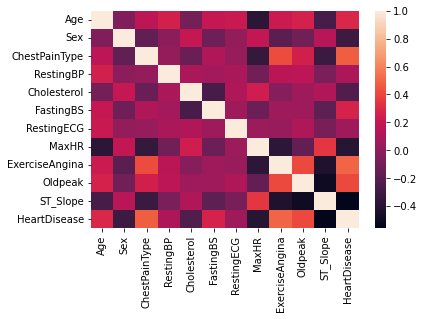

In [86]:
sns.heatmap(data.corr())

Больше всего влияют: ST_Slope, ExerciseAngina, ChestPainType  
Меньше всего: RestingECG

In [29]:
data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,2.251634,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,0.000000,2.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,0.000000,3.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,0.000000,3.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


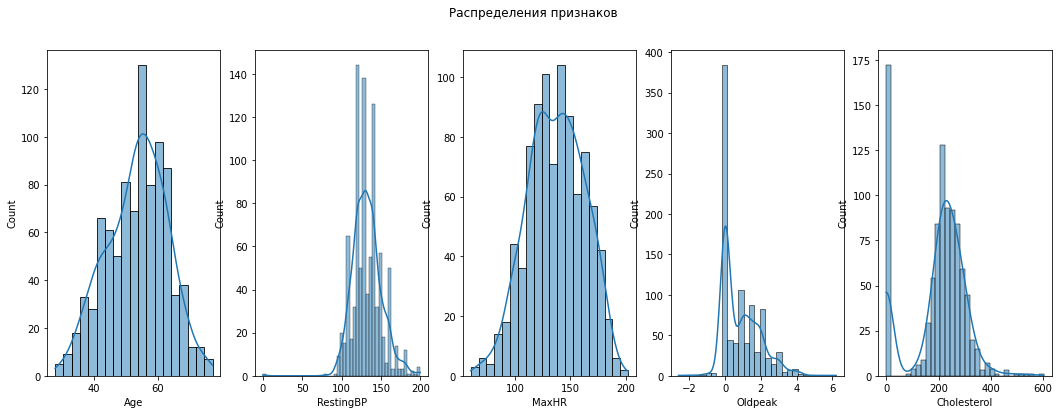

In [84]:
fig, ax = plt.subplots(1,5, figsize=(18,6))
fig.suptitle('Распределения признаков')
sns.histplot(data['Age'], ax = ax[0], kde = True)
sns.histplot(data['RestingBP'], ax = ax[1], kde = True)
sns.histplot(data['MaxHR'], ax = ax[2], kde = True)
sns.histplot(data['Oldpeak'], ax = ax[3], kde = True)
sns.histplot(data['Cholesterol'], ax = ax[4], kde = True)
None

Имеются выбросы в виде холестерина равного 0. Это физически невозможно. Возьмем как среднее для больных и здорвых, так как данных и так мало.

In [35]:
a = data[(data['Cholesterol'] != 0) & (data['HeartDisease'] == 1)]['Cholesterol'].mean()
b = data[(data['Cholesterol'] != 0) & (data['HeartDisease'] == 0)]['Cholesterol'].mean()


for i in range(data.shape[0]):
    if data['Cholesterol'][i] == 0 and data['HeartDisease'][i] == 1:
        data.at[i, 'Cholesterol'] = a
    if data['Cholesterol'][i] == 0 and data['HeartDisease'][i] == 0:
        data.at[i, 'Cholesterol'] = b

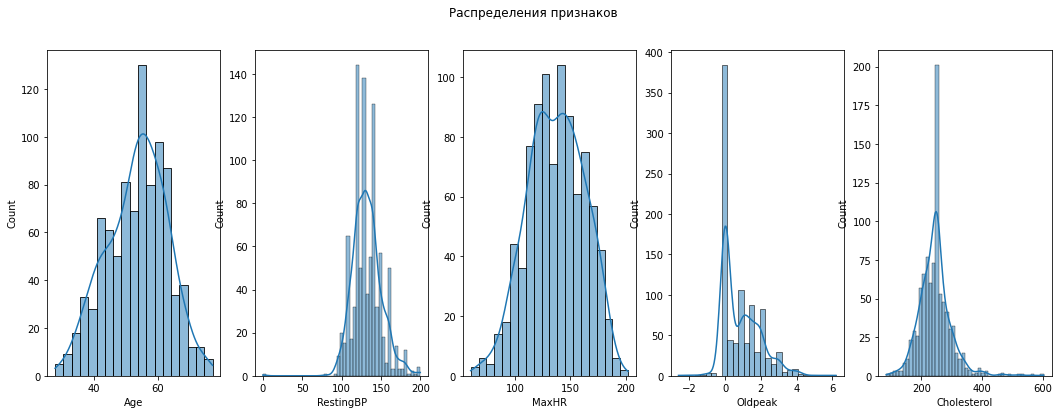

In [36]:
fig, ax = plt.subplots(1,5, figsize=(18,6))
fig.suptitle('Распределения признаков')
sns.histplot(data['Age'], ax = ax[0], kde = True)
sns.histplot(data['RestingBP'], ax = ax[1], kde = True)
sns.histplot(data['MaxHR'], ax = ax[2], kde = True)
sns.histplot(data['Oldpeak'], ax = ax[3], kde = True)
sns.histplot(data['Cholesterol'], ax = ax[4], kde = True)
None

Теперь данные более соответствуют реальности

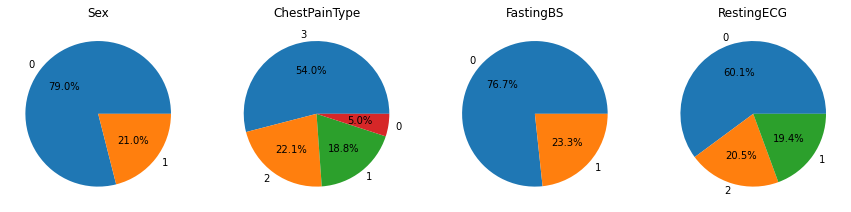

In [40]:
fig = plt.figure(figsize=(15,15))
plt.subplot(1, 4, 1)
plt.pie(data["Sex"].value_counts(), labels = data["Sex"].value_counts().index, autopct='%1.1f%%')
plt.title("Sex")

plt.subplot(1, 4, 2)
plt.pie(data["ChestPainType"].value_counts(), labels = data["ChestPainType"].value_counts().index, autopct='%1.1f%%')
plt.title("ChestPainType")

plt.subplot(1, 4, 3)
plt.pie(data["FastingBS"].value_counts(), labels = data["FastingBS"].value_counts().index, autopct='%1.1f%%')
plt.title("FastingBS")

plt.subplot(1, 4, 4)
plt.pie(data["RestingECG"].value_counts(), labels = data["RestingECG"].value_counts().index, autopct='%1.1f%%')
plt.title("RestingECG")

plt.show()

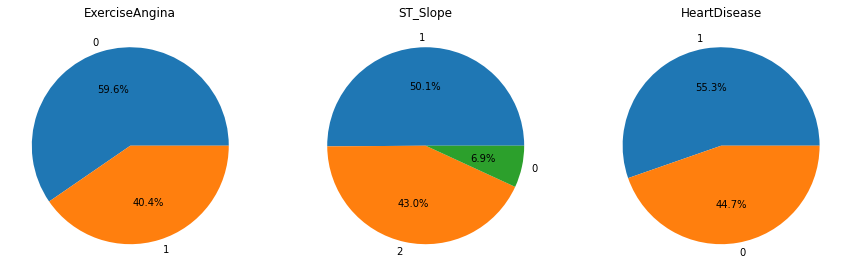

In [39]:
fig = plt.figure(figsize=(15,15))
plt.subplot(1, 3, 1)

plt.subplot(1, 3, 1)
plt.pie(data["ExerciseAngina"].value_counts(), labels = data["ExerciseAngina"].value_counts().index, autopct='%1.1f%%')
plt.title("ExerciseAngina")

plt.subplot(1, 3, 2)
plt.pie(data["ST_Slope"].value_counts(), labels = data["ST_Slope"].value_counts().index, autopct='%1.1f%%')
plt.title("ST_Slope")

plt.subplot(1, 3, 3)
plt.pie(data["HeartDisease"].value_counts(), labels = data["HeartDisease"].value_counts().index, autopct='%1.1f%%')
plt.title("HeartDisease")
plt.show()

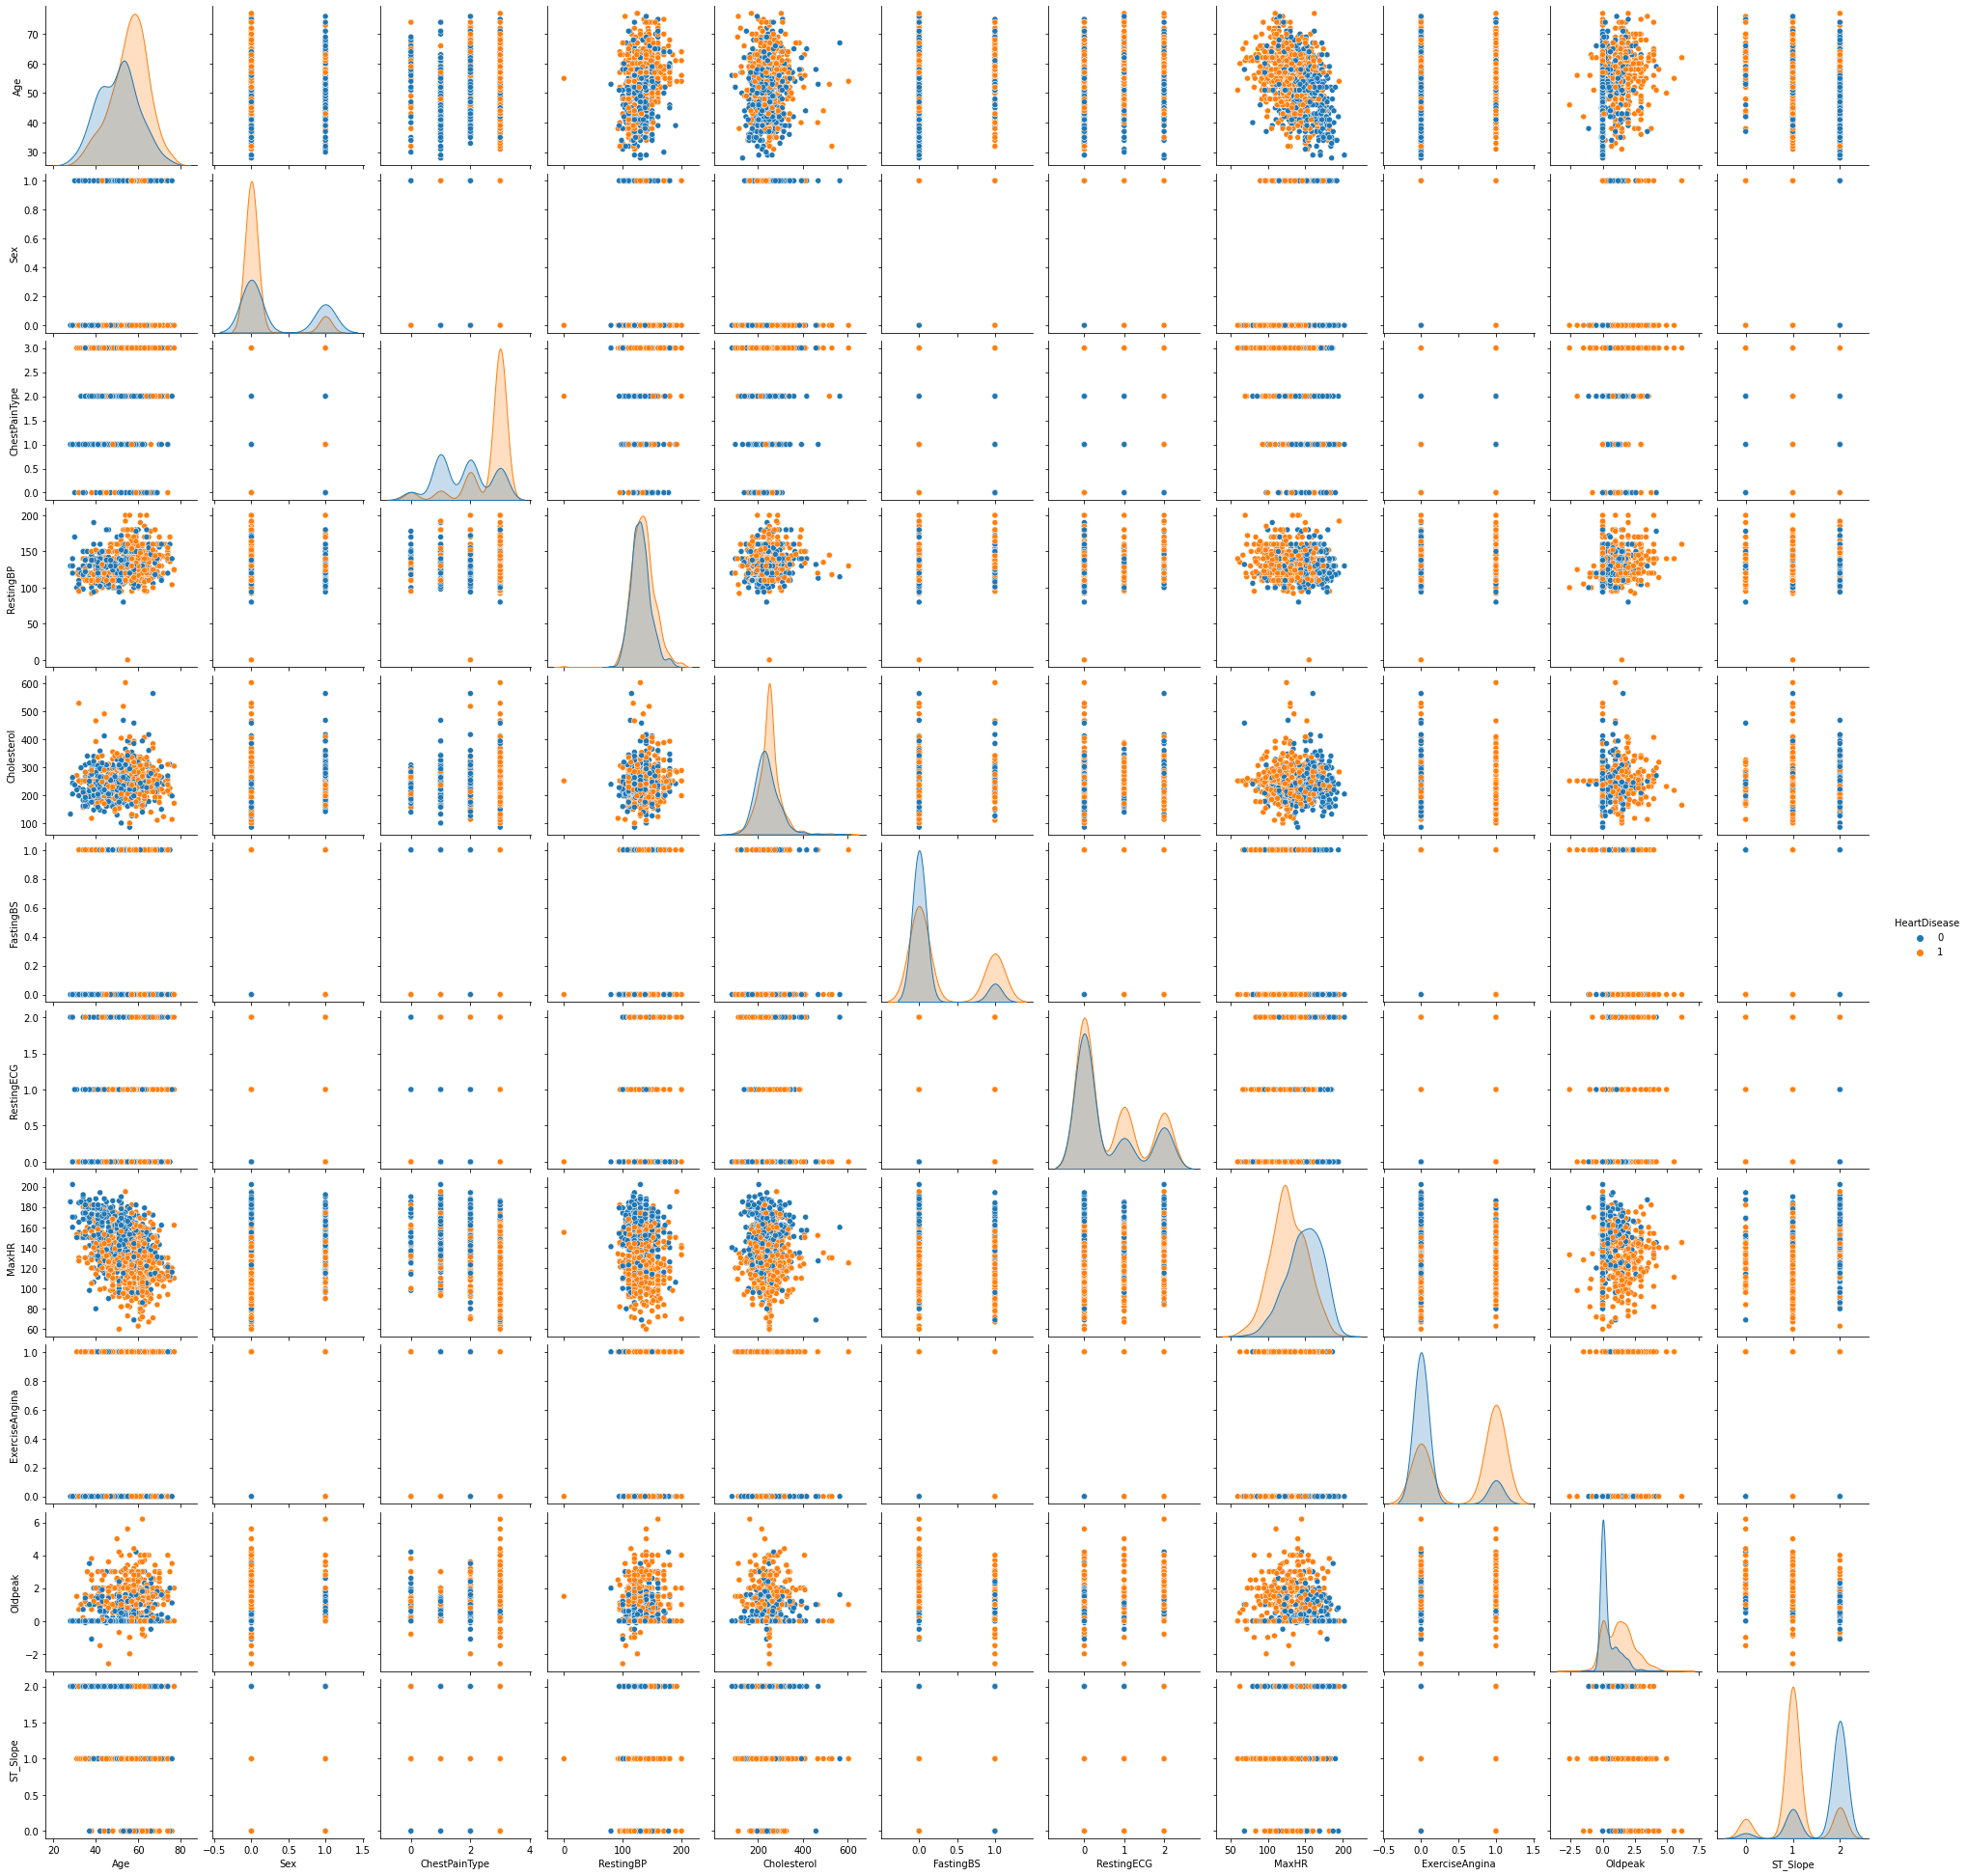

In [42]:
sns.pairplot(data=data, hue='HeartDisease')
None